In [1]:
%pip install mediapipe opencv-python


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.0 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 61.0/61.0 kB 1.1 MB/s eta 0:00:00
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached sentencepiece-0.2.0-cp311-cp311-win_amd64.whl.metadata (8.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\wudalikr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   -------------------------------- ------- 13.0/15.8 MB 1.1 MB/s eta 0:00:03
   -------------------------------- ------- 13.0/15.8 MB 1.1 MB/s eta 0:00:03
   -------------------------------- ------- 13.0/15.8 MB 1.1 MB/s eta 0:00:03
   -------------------------------- ------- 13.0/15.8 MB 1.1 MB/s eta 0:00:03
   --------------------------------- ------ 13.1/15.8 MB 1.1 MB/s eta 0:00:03
   --------------------------------- ------ 13.1/15.8 MB 1.1 MB/s eta 0:00:03
   --------------------------------- ------ 13.1/15.8 MB 1.1 MB/s eta 0:00:03
   --------------------------------- ------ 13.1/15.8 MB 1.1 MB/s eta 0:00:03
   --------------------------------- ------ 13.2/15.8 MB 1.0 MB/s eta 0:00:03
   --------------------------------- ------ 13.2/15.8 MB 1.0 MB/s eta 0:00:03
   --------------------------------- ------ 13.3/15.8 MB 1.0 MB/s eta 0:00:03
   --------------------------------- ------ 13.3/15.8 MB 1.0 MB/s eta 0:00:03
   --------------------------------- ------ 13.3/15.8 MB 1.0 MB

In [6]:
%pip install streamlit

  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     ------------------------------------ --- 41.0/44.3 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 44.3/44.3 kB 1.1 MB/s eta 0:00:00
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached charset_normalizer-3.4.0-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ----


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\wudalikr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import cv2
import mediapipe as mp
import numpy as np
import time
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
# Function to calculate angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First point
    b = np.array(b)  # Midpoint
    c = np.array(c)  # Last point
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
        
    return angle

Get ready! The timer will run for 30 seconds.

Time's up! Here are your results:
Correct Squats: 1
Incorrect Squats: 9


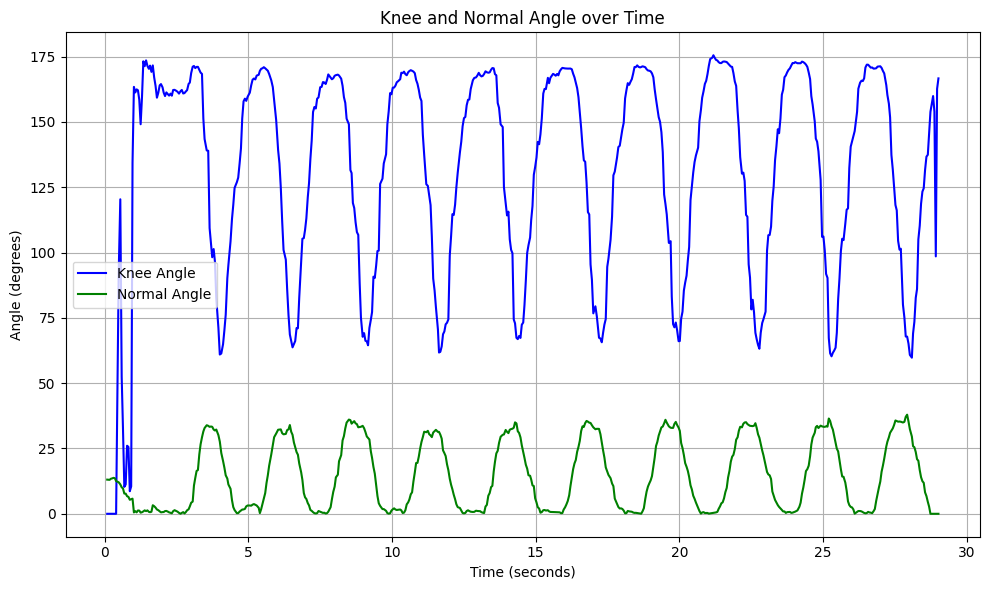

In [6]:
# Squat counter variables
counter = 0
incorrect_counter = 0
stage = "State 1"  # Default stage: Standing
timer_duration = 30  # Timer duration in seconds

# Lists to store time and angles
time_list = []
knee_angle_list = []
back_angle_list = []
normal_angle_list = []
stage_list = []
frame_index = 0

# Mediapipe Pose model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    cap = cv2.VideoCapture(0)  # Open camera
   
    if not cap.isOpened():
        print("Error: Unable to access the camera.")
    else:
        print("Get ready! The timer will run for 30 seconds.")
        start_time = time.time()  # Start the timer
       
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                print("Error: Unable to grab frame.")
                break
           
            # Convert frame to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
            results = pose.process(image)
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            elapsed_time = time.time() - start_time
            try:
                # Extract landmarks
                landmarks = results.pose_landmarks.landmark
               
                # Choose left or right side dynamically
                left_visibility = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].visibility
                right_visibility = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].visibility
               
                if left_visibility > right_visibility:
                    hip = [landmarks[23].x, landmarks[23].y]  # LEFT_HIP
                    knee = [landmarks[25].x, landmarks[25].y]  # LEFT_KNEE
                    ankle = [landmarks[27].x, landmarks[27].y]  # LEFT_ANKLE
                    toe = [landmarks[31].x, landmarks[31].y]  # LEFT_FOOT_INDEX
                    shoulder = [landmarks[11].x, landmarks[11].y]  # LEFT_SHOULDER
                else:
                    hip = [landmarks[24].x, landmarks[24].y]  # RIGHT_HIP
                    knee = [landmarks[26].x, landmarks[26].y]  # RIGHT_KNEE
                    ankle = [landmarks[28].x, landmarks[28].y]  # RIGHT_ANKLE
                    toe = [landmarks[32].x, landmarks[32].y]  # RIGHT_FOOT_INDEX
                    shoulder = [landmarks[12].x, landmarks[12].y]  # RIGHT_SHOULDER
               
                normal = [hip[0], hip[1]-0.5]
                # Calculate angles
                knee_angle = calculate_angle(hip, knee, ankle)
                normal_angle = calculate_angle(shoulder, hip, normal)

                # Record angles and time
                # elapsed_time = time.time() - start_time
                time_list.append(elapsed_time)
                knee_angle_list.append(knee_angle)
                normal_angle_list.append(normal_angle)

                # Map stage to numerical value
                if stage == "State 1":
                    stage_list.append(1)
                elif stage == "State 2":
                    stage_list.append(2)
                elif stage == "State 3":
                    stage_list.append(3)
               
                # Squat logic
                if stage == "State 1" and knee_angle > 160:  # Standing
                    stage = "State 2"  # Start squat
                elif stage == "State 2" and knee_angle <= 90:  # Squatting
                    if 20 <= normal_angle <= 45 and knee[0] <= toe[0]:  # Correct squat conditions
                        counter += 1
                    else:
                        incorrect_counter += 1
                    stage = "State 3"  # Final squat state
                elif stage == "State 3" and knee_angle > 160:  # Back to standing
                    stage = "State 1"
               
                # Display angles and counter on the frame
                cv2.putText(image, f"Knee Angle: {int(knee_angle)}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
                cv2.putText(image, f"Normal Angle: {int(normal_angle)}", (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
                cv2.putText(image, f"Correct: {counter}", (50, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                cv2.putText(image, f"Incorrect: {incorrect_counter}", (50, 140), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
               
            except:
                time_list.append(elapsed_time)
                knee_angle_list.append(0)
                back_angle_list.append(0)
                stage_list.append(0)
           
            # Draw landmarks on the frame
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))
           
            # Calculate remaining time
            #time_list.append(elapsed_time)
            remaining_time = max(0, int(timer_duration - elapsed_time))
           
            # Display timer on the frame
            cv2.putText(image, f"Timer: {remaining_time} sec", (450, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
           
            # Show the video feed
            cv2.imshow("Squat Counter", image)
           
            # Break loop when time is up
            if remaining_time <= 0 or cv2.waitKey(10) & 0xFF == ord('q'):
                break
           
            # Break the loop if 'q' is pressed
            # if cv2.waitKey(10) & 0xFF == ord('q'):
            #     break
       
        cap.release()
        cv2.destroyAllWindows()
       
        print(f"\nTime's up! Here are your results:")
        print(f"Correct Squats: {counter}")
        print(f"Incorrect Squats: {incorrect_counter}")

        max_length = max(len(time_list), len(knee_angle_list), len(normal_angle_list))

        # Pad the shorter lists with zeros
        time_list.extend([0] * (max_length - len(time_list)))
        knee_angle_list.extend([0] * (max_length - len(knee_angle_list)))
        normal_angle_list.extend([0] * (max_length - len(normal_angle_list)))
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot the knee angle and normal angle
        ax.plot(time_list, knee_angle_list, label="Knee Angle", color='blue')
        ax.plot(time_list, normal_angle_list, label="Normal Angle", color='green')

        # Add title and labels
        ax.set_title("Knee and Normal Angle over Time")
        ax.set_xlabel("Time (seconds)")
        ax.set_ylabel("Angle (degrees)")

        # Show legend
        ax.legend()

        # Add grid for clarity
        ax.grid(True)

        # Display the plot
        plt.tight_layout()
        plt.show()

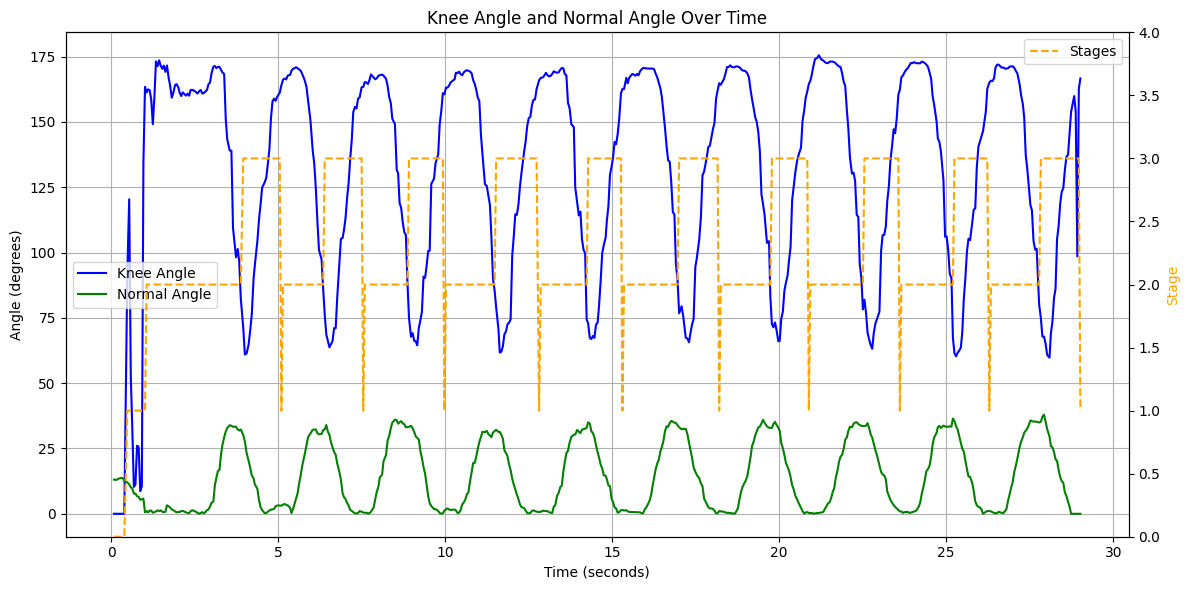

In [7]:
# Define marker styles and colors for each stage
stage_markers = {
    1: {"color": "red", "label": "Stage 1 (Standing)"},  # Stage 1
    2: {"color": "blue", "label": "Stage 2 (Squatting)"},  # Stage 2
    3: {"color": "green", "label": "Stage 3 (Transitioning)"},  # Stage 3
}

# Plotting logic
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot knee angle
ax1.plot(time_list, knee_angle_list, label="Knee Angle", color="blue", linewidth=1.5)

# Plot back angle
ax1.plot(time_list, normal_angle_list, label="Normal Angle", color="green", linewidth=1.5)

# Labeling for knee and back angle plot
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Angle (degrees)")
ax1.set_title("Knee Angle and Normal Angle Over Time")

# Add legend for the angles
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys())

# Enable grid for the angle plot
ax1.grid(True)

# Create a second y-axis for the stages
ax2 = ax1.twinx()

# Plot the stages as a line graph with distinct colors
stage_line = []
for i, stage in enumerate(stage_list):
    stage_line.append(stage)  # Use the stage number as a line indicator

# Plot the stage line
ax2.plot(time_list, stage_line, label="Stages", color="orange", linewidth=1.5, linestyle="--")

# Labeling for the stage plot
ax2.set_ylabel("Stage", color="orange")
ax2.set_ylim(0, 4)  # Assuming the stages are numbered 1, 2, and 3

# Add legend for stages
ax2.legend(loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()